In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

data_path = os.path.join('..', 'data', 'merged_data.csv')
merged_df = pd.read_csv(data_path)

In [2]:
features = ["pts_reg", "asts_reg", "reb_reg", "stl_reg", "blk_reg", "fga_reg", "fta_reg", "tpa_reg"]
X = merged_df[features]
y = merged_df['is_all_star']

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

# Fit and predict
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Logistic Regression': lr}
results = {}

In [4]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    results[name] = model


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2849
           1       0.94      0.94      0.94      3713

    accuracy                           0.93      6562
   macro avg       0.93      0.93      0.93      6562
weighted avg       0.93      0.93      0.93      6562

[[2617  232]
 [ 235 3478]]
Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2849
           1       0.86      0.80      0.83      3713

    accuracy                           0.81      6562
   macro avg       0.81      0.82      0.81      6562
weighted avg       0.82      0.81      0.82      6562

[[2384  465]
 [ 751 2962]]
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2849
           1       0.85      0.80      0.82      3713

    

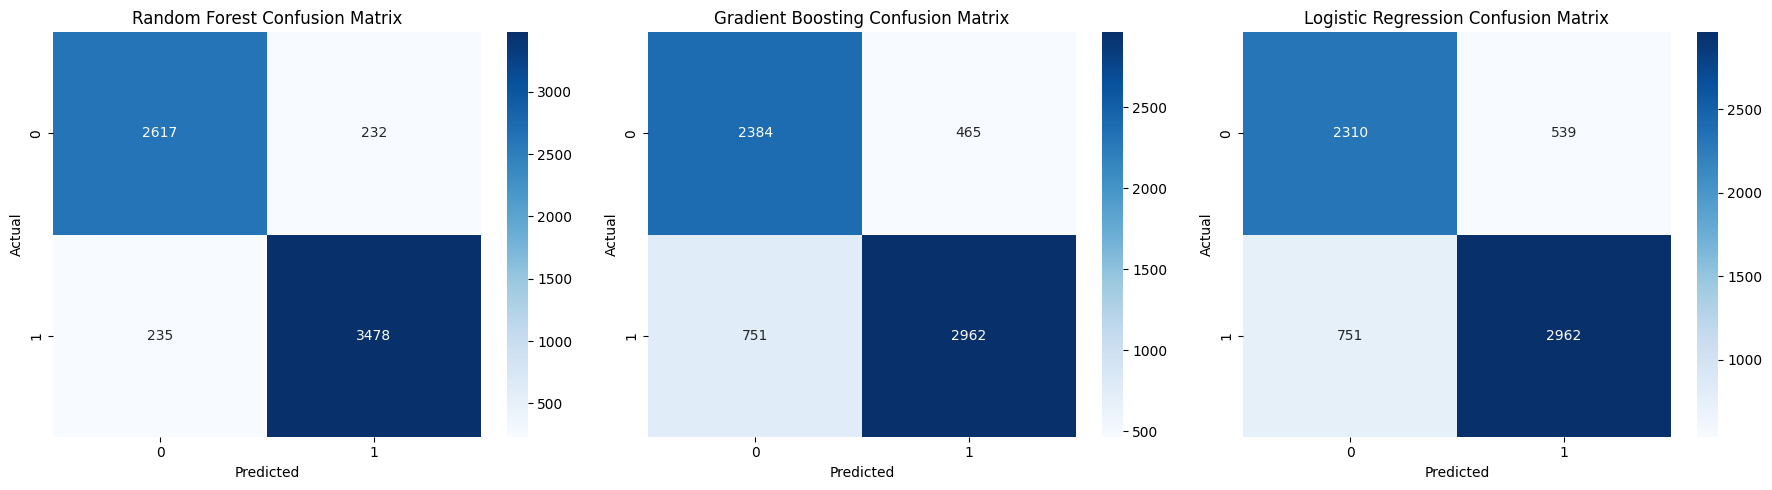

In [5]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")
best_model_final = grid_search.best_estimator_

In [ ]:


# Evaluate tuned model
y_pred_final = best_model_final.predict(X_test)
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred_final))

# Plot final confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title('Final Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()